In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pencemaran udara jkt.csv')
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
905,2020-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,71,14,23,97,13,97.0,O3,SEDANG
906,2020-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,55,14,11,64,7,64.0,O3,SEDANG
907,2020-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,58,16,10,71,7,71.0,O3,SEDANG
908,2020-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,15,10,90,11,90.0,O3,SEDANG


In [2]:
df = df.drop(['stasiun','critical','tanggal','max'], axis =1)
df

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK
...,...,...,...,...,...,...
905,71,14,23,97,13,SEDANG
906,55,14,11,64,7,SEDANG
907,58,16,10,71,7,SEDANG
908,56,15,10,90,11,SEDANG


In [3]:
duplikat = df[df.duplicated()]
print("Data Duplikat:")
print(duplikat)

Data Duplikat:
    pm10  so2   co   o3  no2        categori
248  ---  ---  ---  ---  ---  TIDAK ADA DATA
404  ---  ---  ---  ---    0  TIDAK ADA DATA
423  ---  ---  ---  ---    0  TIDAK ADA DATA
728  ---  ---  ---  ---  ---  TIDAK ADA DATA
859  ---  ---  ---  ---  ---  TIDAK ADA DATA


In [4]:
df = df[df['categori'] != 'TIDAK ADA DATA']

In [5]:
uniq_values = df['categori'].unique()
uniq_values

array(['BAIK', 'SEDANG', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT'],
      dtype=object)

In [6]:
mapping = {'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2, 'SANGAT TIDAK SEHAT': 3}

# Mengganti nilai dalam kolom 'categori'
df['categori'] = df['categori'].replace(mapping)

C:\Users\Luqna Aziziyah\AppData\Local\Temp\ipykernel_17000\2624450814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categori'] = df['categori'].replace(mapping)


In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

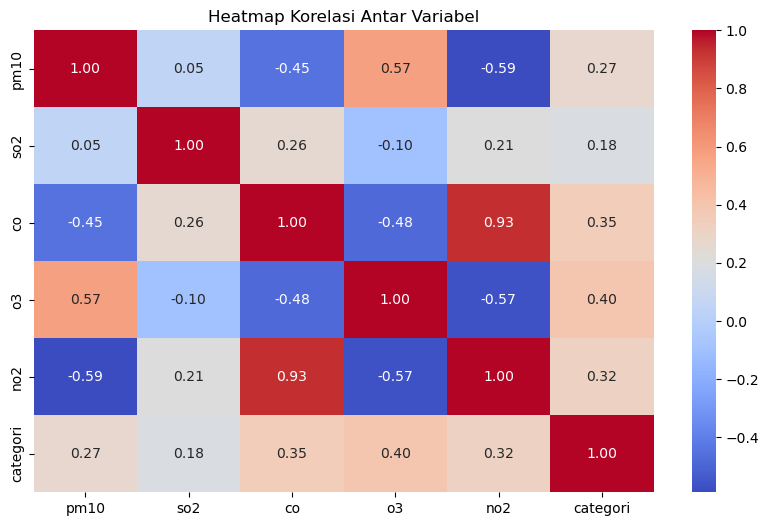

In [8]:
import seaborn as sns

correlation = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [9]:
df= df.dropna()

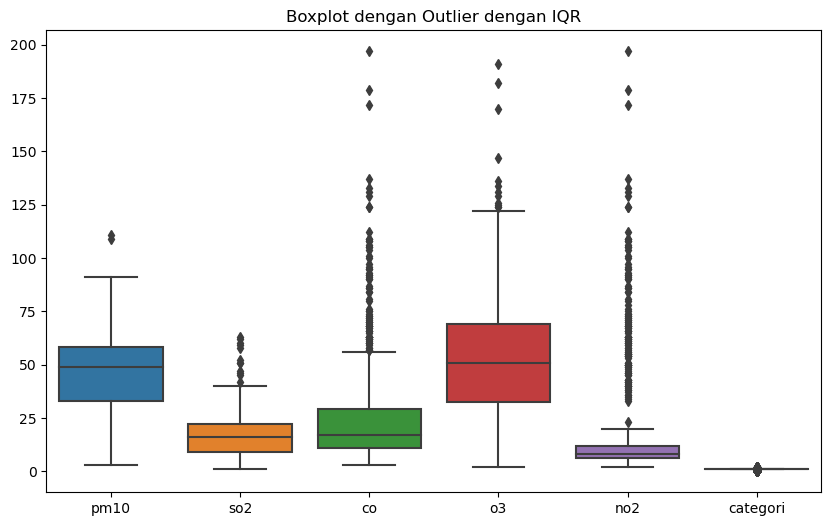

In [10]:
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = outliers.append(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    return outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot dengan Outlier dengan IQR")
plt.show()

Outliers: [256, 258, 386, 389, 394, 395, 396, 398, 15, 406, 407, 408, 409, 410, 288, 420, 555, 428, 434, 435, 436, 437, 566, 439, 438, 440, 451, 454, 593, 350, 358, 360, 364, 365, 756, 375, 377, 378]


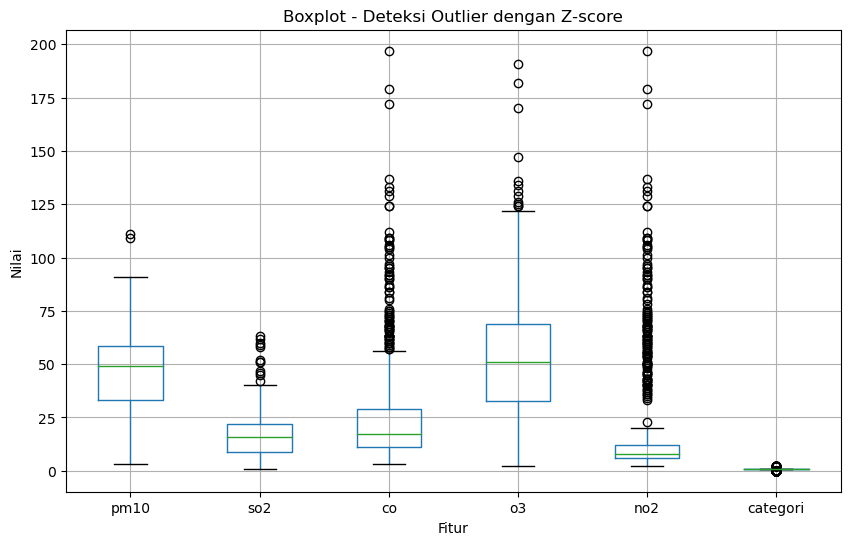

In [11]:
def detect_outliers_zscore(data):
    threshold = 3
    outliers = []
    for col in data.columns:
        z_scores = (data[col] - data[col].mean()) / data[col].std()
        outliers.extend(data.index[z_scores.abs() > threshold].tolist())
    return list(set(outliers))

outliers_indices = detect_outliers_zscore(df)

# Menampilkan outlier
print("Outliers:", outliers_indices)

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot - Deteksi Outlier dengan Z-score")
plt.ylabel("Nilai")
plt.xlabel("Fitur")
plt.show()

In [12]:
grouped = df.groupby('categori')

# Menyimpan setiap kelompok ke file CSV terpisah
for name, group in grouped:
    group.to_csv(f'categori_{name}.csv', index=False)

## bagi menjadi beberapa golongan menurut categori udara

### DF0

In [13]:
df0=pd.read_csv('categori_0.csv')
df0

,pm10,so2,co,o3,no2,categori
0,30.0,20.0,10.0,32.0,9.0,0
1,27.0,22.0,12.0,29.0,8.0,0
2,39.0,22.0,14.0,32.0,10.0,0
3,34.0,22.0,14.0,38.0,10.0,0
4,35.0,22.0,12.0,31.0,9.0,0
...,...,...,...,...,...,...
191,43.0,21.0,12.0,45.0,11.0,0
192,50.0,22.0,14.0,49.0,5.0,0
193,43.0,21.0,12.0,41.0,4.0,0
194,40.0,9.0,10.0,48.0,3.0,0


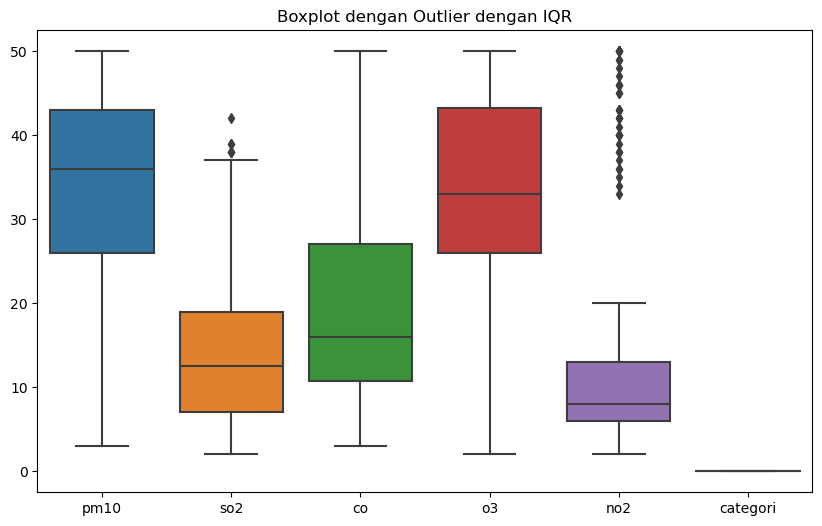

In [14]:
def detect_outliers(df0):
    outliers = pd.DataFrame(columns=df0.columns)
    for column in df0.columns:
        if df0[column].dtype != 'object':
            Q1 = df0[column].quantile(0.25)
            Q3 = df0[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = outliers.append(df0[(df0[column] < lower_bound) | (df0[column] > upper_bound)])
    return outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df0)
plt.title("Boxplot dengan Outlier dengan IQR")
plt.show()

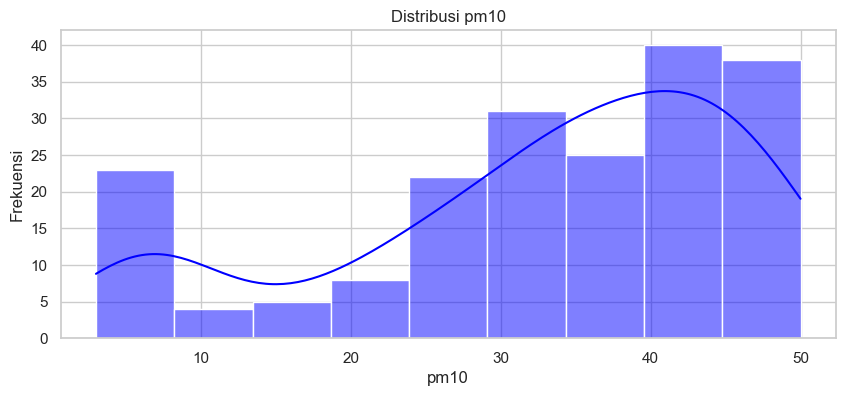

pm10 tidak berdistribusi normal


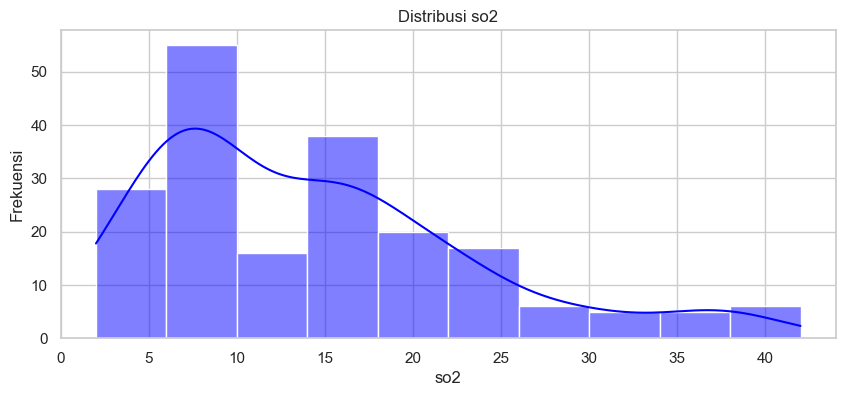

so2 tidak berdistribusi normal


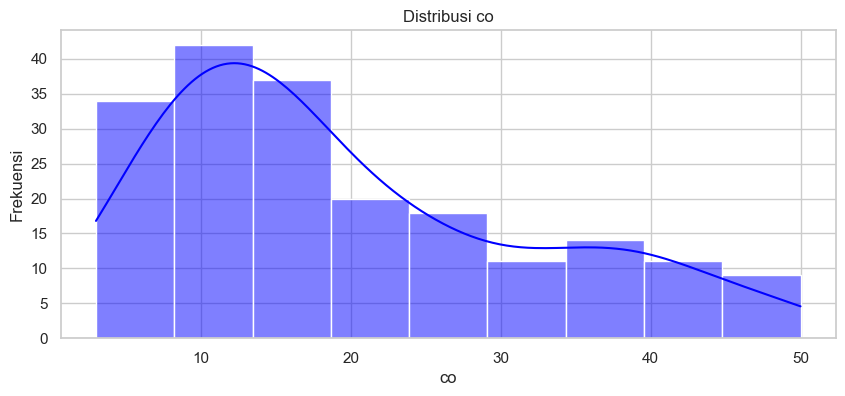

co tidak berdistribusi normal


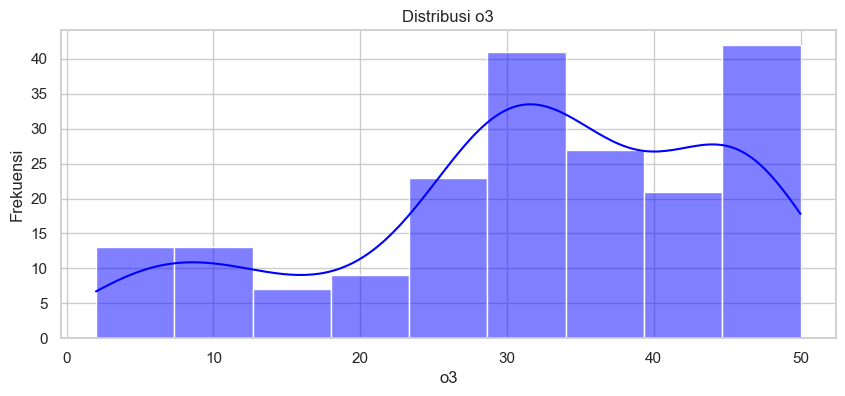

o3 tidak berdistribusi normal


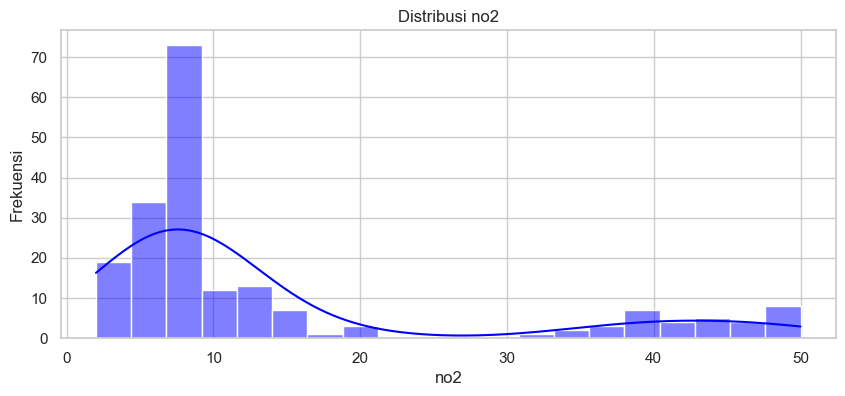

no2 tidak berdistribusi normal


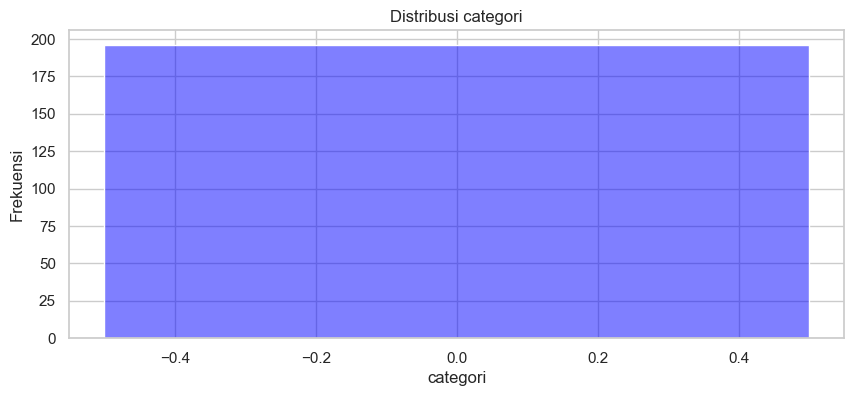

categori tidak berdistribusi normal

Statistik Deskriptif:
             pm10         so2          co          o3         no2  categori
count  196.000000  196.000000  196.000000  196.000000  196.000000     196.0
mean    32.760204   14.224490   19.775510   31.642857   14.066327       0.0
std     13.399910    9.074089   12.286771   12.887084   13.696366       0.0
min      3.000000    2.000000    3.000000    2.000000    2.000000       0.0
25%     26.000000    7.000000   10.750000   26.000000    6.000000       0.0
50%     36.000000   12.500000   16.000000   33.000000    8.000000       0.0
75%     43.000000   19.000000   27.000000   43.250000   13.000000       0.0
max     50.000000   42.000000   50.000000   50.000000   50.000000       0.0


In [15]:
from scipy.stats import normaltest
sns.set(style="whitegrid")

# Menampilkan histogram untuk setiap kolom
for col in df0.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df0[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
    
    # Normality test
    stat, p = normaltest(df0[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} berdistribusi normal')
    else:
        print(f'{col} tidak berdistribusi normal')

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df0.describe())

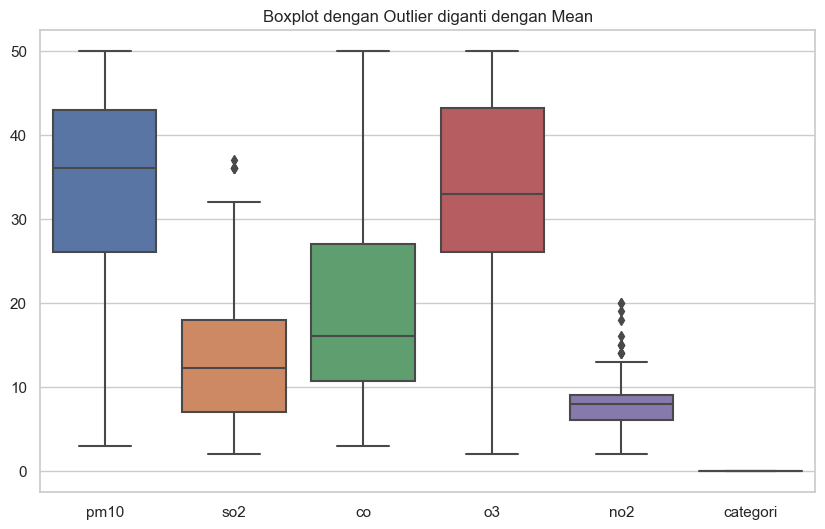

In [16]:
def replace_outliers_with_median(df0):
    for column in df0.columns:
        if df0[column].dtype != 'object':
            Q1 = df0[column].quantile(0.25)
            Q3 = df0[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df0[column] = df0[column].mask((df0[column] < lower_bound) | (df0[column] > upper_bound), df0[column].median())
    return df0

plt.figure(figsize=(10, 6))
sns.boxplot(data=replace_outliers_with_median(df0))
plt.title("Boxplot dengan Outlier diganti dengan Mean")
plt.show()


In [17]:
df0 = replace_outliers_with_median(df0)

### DF1

In [18]:
df1=pd.read_csv('categori_1.csv')
df1

,pm10,so2,co,o3,no2,categori
0,52.0,23.0,29.0,24.0,12.0,1
1,52.0,60.0,19.0,30.0,8.0,1
2,51.0,34.0,21.0,74.0,20.0,1
3,61.0,34.0,36.0,58.0,15.0,1
4,54.0,7.0,16.0,41.0,8.0,1
...,...,...,...,...,...,...
556,71.0,14.0,23.0,97.0,13.0,1
557,55.0,14.0,11.0,64.0,7.0,1
558,58.0,16.0,10.0,71.0,7.0,1
559,56.0,15.0,10.0,90.0,11.0,1


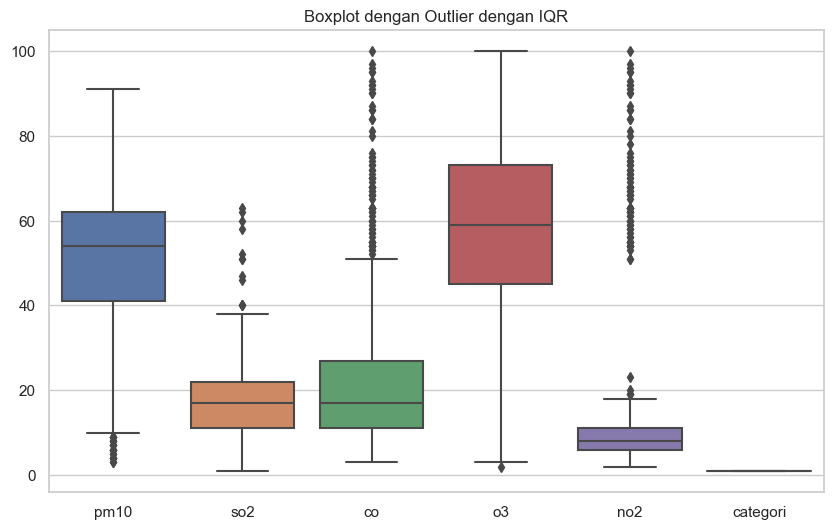

In [19]:
def detect_outliers(df1):
    outliers = pd.DataFrame(columns=df1.columns)
    for column in df1.columns:
        if df0[column].dtype != 'object':
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = outliers.append(df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)])
    return outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title("Boxplot dengan Outlier dengan IQR")
plt.show()

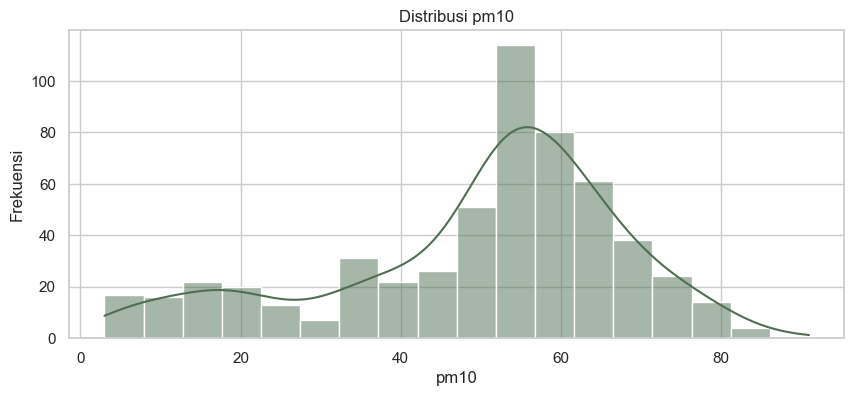

pm10 tidak berdistribusi normal


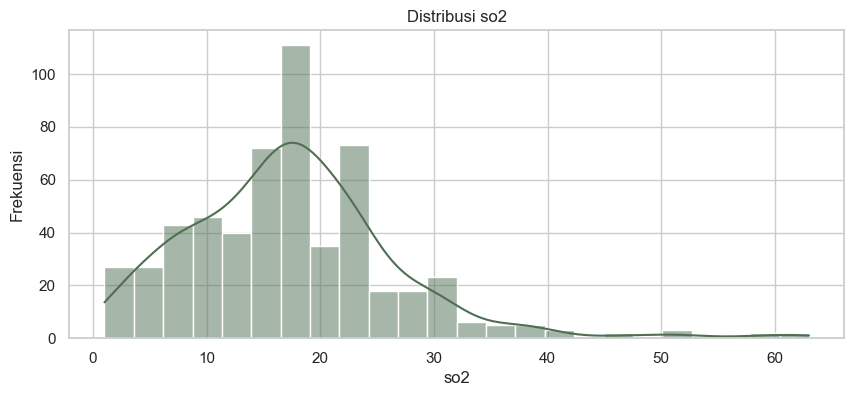

so2 tidak berdistribusi normal


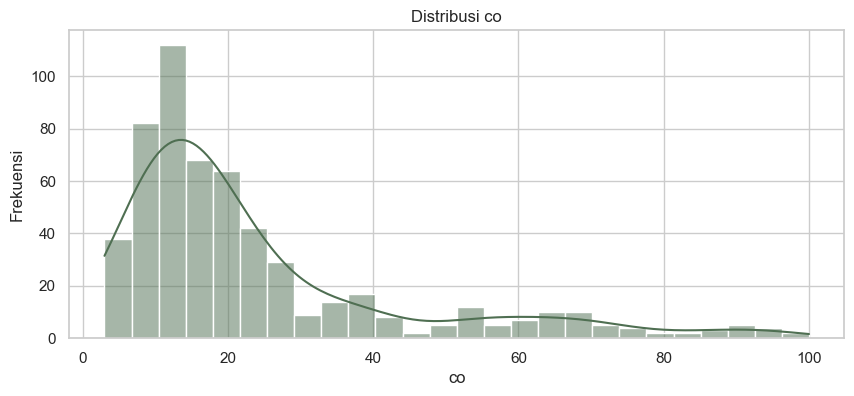

co tidak berdistribusi normal


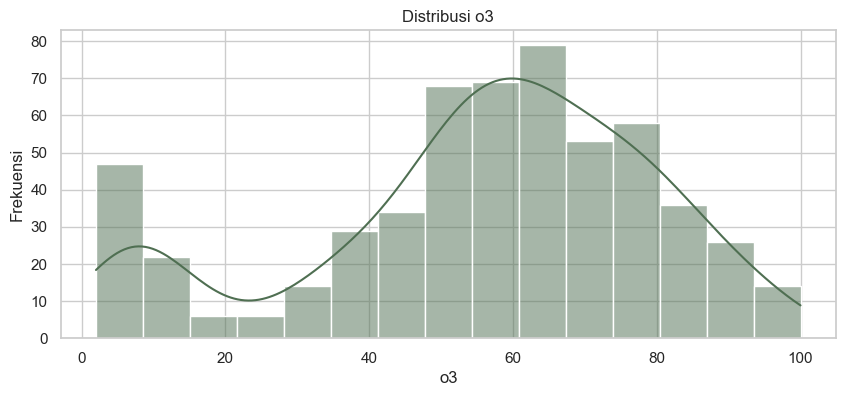

o3 tidak berdistribusi normal


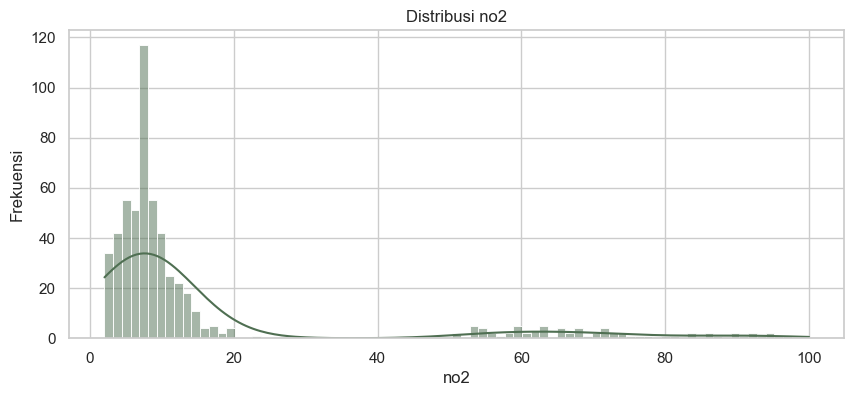

no2 tidak berdistribusi normal


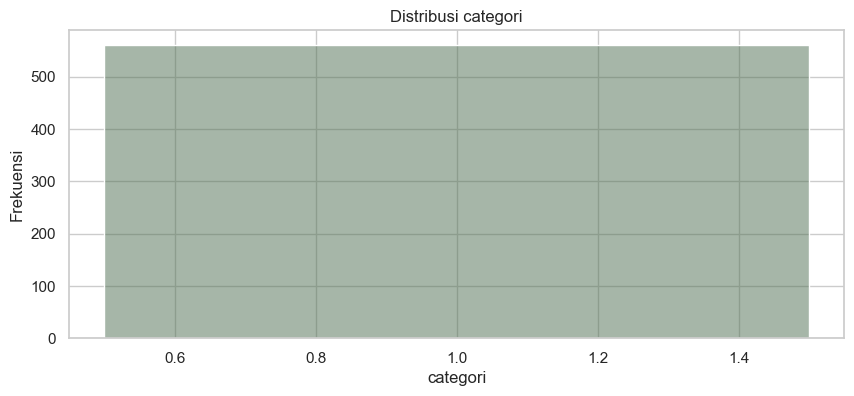

categori tidak berdistribusi normal

Statistik Deskriptif:
             pm10         so2          co          o3         no2  categori
count  561.000000  561.000000  561.000000  561.000000  561.000000     561.0
mean    49.581105   17.393939   23.991087   55.736185   15.975045       1.0
std     18.397329    9.218764   20.232177   23.961388   21.662412       0.0
min      3.000000    1.000000    3.000000    2.000000    2.000000       1.0
25%     41.000000   11.000000   11.000000   45.000000    6.000000       1.0
50%     54.000000   17.000000   17.000000   59.000000    8.000000       1.0
75%     62.000000   22.000000   27.000000   73.000000   11.000000       1.0
max     91.000000   63.000000  100.000000  100.000000  100.000000       1.0


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1667: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1771: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


In [20]:
from scipy.stats import normaltest
sns.set(style="whitegrid")

# Menampilkan histogram untuk setiap kolom
for col in df1.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df1[col], kde=True, color='#4F6F52')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
    
    # Normality test
    stat, p = normaltest(df1[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} berdistribusi normal')
    else:
        print(f'{col} tidak berdistribusi normal')

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df1.describe())

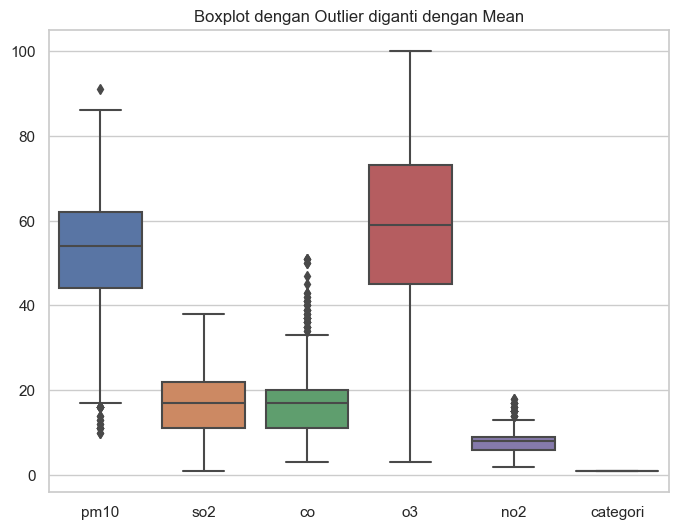

In [21]:
def replace_outliers_with_median(df1):
    for column in df1.columns:
        if df1[column].dtype != 'object':
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df1[column] = df1[column].mask((df1[column] < lower_bound) | (df1[column] > upper_bound), df1[column].median())
    return df1

plt.figure(figsize=(8, 6))
sns.boxplot(data=replace_outliers_with_median(df1))
plt.title("Boxplot dengan Outlier diganti dengan Mean")
plt.show()


In [22]:
df1 = replace_outliers_with_median(df1)

### DF2

In [23]:
df2=pd.read_csv('categori_2.csv')
df2

,pm10,so2,co,o3,no2,categori
0,52.0,12.0,40.0,119.0,12.0,2
1,76.0,14.0,62.0,110.0,10.0,2
2,71.0,29.0,36.0,125.0,6.0,2
3,22.0,15.0,24.0,102.0,7.0,2
4,48.0,16.0,19.0,126.0,6.0,2
5,62.0,15.0,46.0,108.0,8.0,2
6,74.0,26.0,47.0,191.0,7.0,2
7,67.0,23.0,27.0,118.0,4.0,2
8,43.0,21.0,22.0,170.0,4.0,2
9,56.0,21.0,27.0,104.0,6.0,2


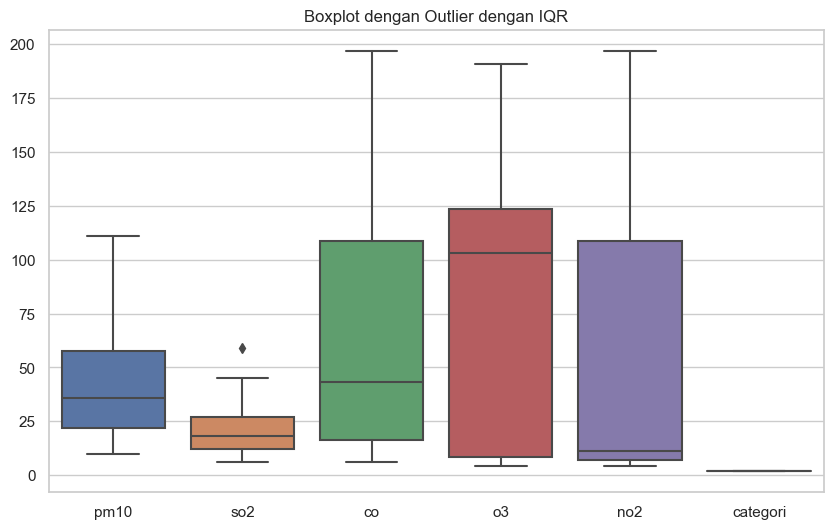

In [24]:
def detect_outliers(df2):
    outliers = pd.DataFrame(columns=df2.columns)
    for column in df2.columns:
        if df2[column].dtype != 'object':
            Q1 = df2[column].quantile(0.25)
            Q3 = df2[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = outliers.append(df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)])
    return outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2)
plt.title("Boxplot dengan Outlier dengan IQR")
plt.show()


### DF3

In [25]:
df3=pd.read_csv('categori_3.csv')
df3

,pm10,so2,co,o3,no2,categori
0,NaN,35.0,213.0,11.0,213.0,3
1,NaN,NaN,201.0,15.0,201.0,3
2,NaN,32.0,206.0,5.0,206.0,3


In [26]:
df3= df3.dropna()

## GABUNGAN

In [27]:
frames = [df0, df1, df2, df3]
df = pd.concat(frames, ignore_index=True)


In [28]:
df

,pm10,so2,co,o3,no2,categori
0,30.0,20.0,10.0,32.0,9.0,0
1,27.0,22.0,12.0,29.0,8.0,0
2,39.0,22.0,14.0,32.0,10.0,0
3,34.0,22.0,14.0,38.0,10.0,0
4,35.0,22.0,12.0,31.0,9.0,0
...,...,...,...,...,...,...
798,57.0,11.0,14.0,122.0,7.0,2
799,34.0,9.0,13.0,119.0,9.0,2
800,32.0,9.0,7.0,136.0,7.0,2
801,48.0,12.0,9.0,134.0,8.0,2


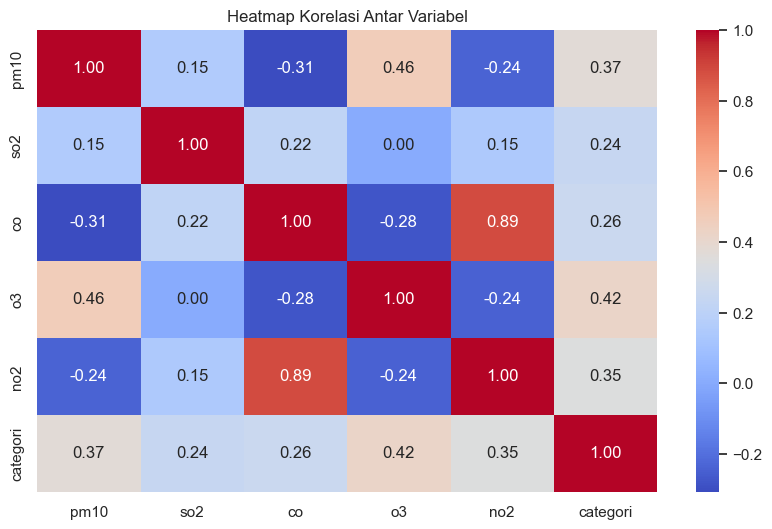

In [29]:
import seaborn as sns

correlation = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [30]:
kolom_standar = ['pm10', 'so2', 'co', 'o3', 'no2']

# Melakukan standarisasi data
mean = df[kolom_standar].mean()
std_dev = df[kolom_standar].std()
standardized_data = (df[kolom_standar] - mean) / std_dev

# Menggabungkan kembali kolom standar dengan kolom non-standar
standardized_df = pd.concat([standardized_data, df[['categori']]], axis=1)

print("Data Asli:")
print(df)
print("\nData yang Sudah Distanadarkan (kecuali kolom 'categori'):")
print(standardized_df)

Data Asli:
     pm10   so2    co     o3   no2  categori
0    30.0  20.0  10.0   32.0   9.0         0
1    27.0  22.0  12.0   29.0   8.0         0
2    39.0  22.0  14.0   32.0  10.0         0
3    34.0  22.0  14.0   38.0  10.0         0
4    35.0  22.0  12.0   31.0   9.0         0
..    ...   ...   ...    ...   ...       ...
798  57.0  11.0  14.0  122.0   7.0         2
799  34.0   9.0  13.0  119.0   9.0         2
800  32.0   9.0   7.0  136.0   7.0         2
801  48.0  12.0   9.0  134.0   8.0         2
802  58.0  18.0  11.0  124.0  19.0         2

[803 rows x 6 columns]

Data yang Sudah Distanadarkan (kecuali kolom 'categori'):
         pm10       so2        co        o3       no2  categori
0   -1.029584  0.512614 -0.492043 -0.678260 -0.070455         0
1   -1.206028  0.763932 -0.387558 -0.785151 -0.124081         0
2   -0.500253  0.763932 -0.283073 -0.678260 -0.016829         0
3   -0.794326  0.763932 -0.283073 -0.464479 -0.016829         0
4   -0.735512  0.763932 -0.387558 -0.713890 -0

## PEMODELAN

In [31]:
from sklearn.model_selection import train_test_split

# Data
X = standardized_df[['pm10', 'so2', 'co' ,'o3','no2']] # Fitur-fitur
y = standardized_df['categori'] # Target

# Pembagian data menjadi data pelatihan dan data pengujian (80% data pelatihan, 20% data pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42, learning_rate_init=0.001)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Iteration 1, loss = 1.10591917
Iteration 2, loss = 0.99636989
Iteration 3, loss = 0.90169206
Iteration 4, loss = 0.81794008
Iteration 5, loss = 0.74449442
Iteration 6, loss = 0.67712279
Iteration 7, loss = 0.62047791
Iteration 8, loss = 0.57366601
Iteration 9, loss = 0.53421722
Iteration 10, loss = 0.50496794
Iteration 11, loss = 0.48159499
Iteration 12, loss = 0.46235565
Iteration 13, loss = 0.44565124
Iteration 14, loss = 0.42994009
Iteration 15, loss = 0.41505880
Iteration 16, loss = 0.40126733
Iteration 17, loss = 0.38993028
Iteration 18, loss = 0.37863518
Iteration 19, loss = 0.36823934
Iteration 20, loss = 0.35872321
Iteration 21, loss = 0.35019392
Iteration 22, loss = 0.34157687
Iteration 23, loss = 0.33347693
Iteration 24, loss = 0.32521168
Iteration 25, loss = 0.31713166
Iteration 26, loss = 0.30919492
Iteration 27, loss = 0.30220053
Iteration 28, loss = 0.29528013
Iteration 29, loss = 0.28866642
Iteration 30, loss = 0.28229474
Iteration 31, loss = 0.27607115
Iteration 32, los

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Prediksi
y_pred = mlp.predict(X_test)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99       116
           2       1.00      0.90      0.95        10

    accuracy                           0.99       161
   macro avg       0.99      0.96      0.97       161
weighted avg       0.99      0.99      0.99       161



In [34]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Akurasi pelatihan dan pengujian
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Akurasi Pelatihan: {:.2f}%".format(train_accuracy * 100))
print("Akurasi Pengujian: {:.2f}%".format(test_accuracy * 100))


Akurasi Pelatihan: 100.00%
Akurasi Pengujian: 98.76%


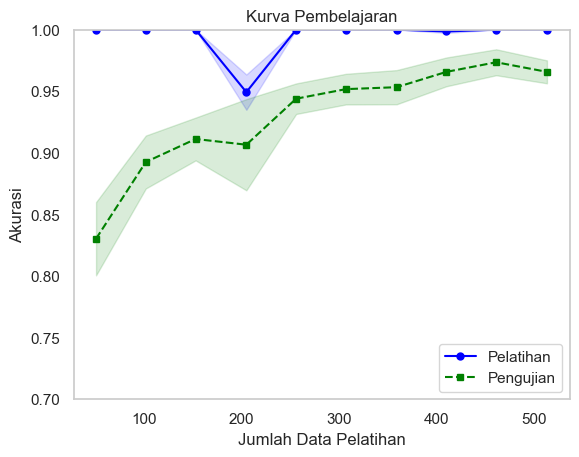

In [35]:
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Pelatihan')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Pengujian')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Jumlah Data Pelatihan')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.0])
plt.title('Kurva Pembelajaran')
plt.show()